<a href="https://colab.research.google.com/github/Adebesindedayo/Introduction-to-deep-learning/blob/main/DNN_hands_on_2021_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Deep Neural Network (DNN)

# 1.1 Keras basics
<img src="https://drive.google.com/uc?id=1qUd5pI-C3DOFbJs8tGos9OCKZmPnNZYB" width="400px"><br>
Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow.<br>
It allows for easy and fast prototyping and supports both convolutional networks and recurrent networks.<br>
Its most important features are: user friendliness, modularity, easy extensibility

In this section we will:
* 1.1.1 Build a Multilayer perceptron

#### Build the same Single Layer Perceptron with Keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 2

# First define the model 
model = Sequential() # model lets us define a linear stack of network layers.

# define our single fully connected network layer
dense_layer = Dense(n_output_nodes, activation='sigmoid',kernel_initializer="Ones",bias_initializer="Ones")

# Add the dense layer to the model
model.add(dense_layer)

## 1.1.2 Build a Multilayer perceptron
Let's build a multilayer perceptron; MLPs are fully connected, each node in one layer connects with a certain weight to every node in the following layer.

<img src="https://drive.google.com/uc?id=16Uxs11_l8xl58978mRsxgEtdaTSG5KGb" width="400px"><br>

Try to build one composed by two hidden dense layer with ReLU activation and one dense output layer(units=1) with sigmoid activation.

In [ ]:
import numpy as np
# Generate dummy data
mu1=1
sigma1=0.1
mu2=0
sigma2=2
train_data = np.zeros((2000))

train_data[0:1000] = np.random.normal(mu1,sigma1,1000)
train_data[1000:2000] = np.random.normal(mu2,sigma2,1000)

# train_data[0:1000] = np.random.uniform(-10,10, size=(1000,))
# train_data[1000:2000] = np.random.uniform(20,50, size=(1000,))

train_labels = np.zeros((2000,2))
train_labels[1000:2000,1] = 1
train_labels[0:1000,0] = 1
test_data = np.zeros((200))

test_data[0:100] = np.random.normal(mu1,sigma1,100)
test_data[100:200] = np.random.normal(mu2,sigma2,100)

# test_data[0:100] = np.random.uniform(-10,10, size=(100,))
# test_data[100:200] = np.random.uniform(20,50, size=(100,))


test_labels = np.zeros((200,2))
test_labels[0:100,0] = 1
test_labels[100:200,1] = 1

# Build your first model by creating a Sequential object and then adding 3 Dense layers:
units = 32
# Create a Sequential
model = Sequential()
# Add a Dense layer with 32 neurons, with relu as activation function and input dimension equal to the number of features
model.add(Dense(units, activation='relu'))
# Add a Dense layer with 32 neurons, with relu as activation function
model.add(Dense(units, activation='relu'))
# To produce the output Add a Dense layer with 1 neurons, with sigmoid as activation function
model.add(Dense(2, activation='sigmoid'))


In [ ]:
# Compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model, iterating on the data in batches of 32 samples
# The fit function output is a History object. The history.history attribute is a record of
# training loss values and metrics values at successive epochs, as well as validation loss values 
# and validation metrics values 
history = model.fit(train_data, train_labels, epochs=30, batch_size=128)
_, train_acc = model.evaluate(train_data, train_labels, verbose=1)
_, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/30
16/16 [==============================] - 3s 2ms/step - loss: 0.7006 - accuracy: 0.4945
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4790
Epoch 3/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6835 - accuracy: 0.4680
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.4580
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.4450
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.4395
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.4990
Epoch 8/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7110
Epoch 9/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6496 - accuracy: 0.8440
Epoch 10/30
16/16 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.8835
Epoch 11/30
16/16 [

**Try to use linear activation function. (activation='linear')**. 

How do the performances change? why?

**Try the same model with linear activation function on samples extracted from two uniform distribution** 

Uncomment the lines with np.random.uniform and comment the lines with np.random.normal in the previous cell code. 

**Try to use non-linear activation function on this toy dataset.** Do the results improve? 

# 1.2 Build a Deep Neural Network 
In this section we will:
*  1.2.1 Import the dataset
*  1.2.2 Build a model
*  1.2.3 Train the model 
*  1.2.4 Evaluate the model

## 1.2.1 Import the Dataset
Fashion-MNIST is a dataset of Zalando’s article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. <br>
Each example is a 28×28 grayscale image, associated with a label from 10 classes.<br>
<img src="https://drive.google.com/uc?id=1bCzydSawhVLUx9F3ee18eIwy0U3eNRMZ" width="600px"><br>


In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf 
mnist_fashion = tf.keras.datasets.fashion_mnist

(x_learn, y_learn),(x_test, y_test) = mnist_fashion.load_data()
x_learn, x_test = x_learn / 255.0, x_test / 255.0 # normalization 
x_train, x_val, y_train, y_val = train_test_split(x_learn, y_learn, test_size=0.3, random_state=42) # split learn in train,val
num_classes = 10 # Fashion-MNIST classes

print(x_train.shape, x_val.shape, x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(42000, 28, 28) (18000, 28, 28) (10000, 28, 28)


#### Plot some sample from the training set

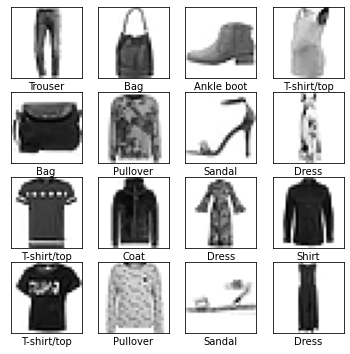

In [ ]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(6,6))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

## 1.2.2 Build a Model

<img src="https://drive.google.com/uc?id=1siIVKXLL7_YsecqlCQqw_ZI35LhR8XbI" width="400px"><br>

A Deep Neural Network is a neural network composed by many layers and consequently it has a deeper structure. The number of layers in the network depends on different factors: for example on the data available, on the complexity of the problem, on the computational power and so on.
The value produced as output by a neuron is determined by the input the neuron receives and by the activation function. There exists different choices for the activation function. One of the most used is Relu but it depends on the data and on the network architecture.
<br><br>
<img src="https://drive.google.com/uc?id=1Rr_1OJeORL6qmGFplC0E2hFj-KapFGN0" width="600px"><br>


#### Build a model with this structure: Flatten+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(ReLU)+Dense(softmax)

In [ ]:
from tensorflow.keras.layers import Flatten
# https://keras.io/layers/core/
model = Sequential()
model.add(Flatten())
# Add a Dense layer with 512 neurons, with relu as activation function
model.add(Dense(512, activation='relu'))
# Add a Dense layer with 256 neurons, with relu as activation function
model.add(Dense(256, activation='relu'))
# Add a Dense layer with 128 neurons, with relu as activation function
model.add(Dense(128, activation='relu'))
# Add a Dense layer with 64 neurons, with relu as activation function
model.add(Dense(64, activation='relu'))
# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(Dense(num_classes, activation='softmax'))

When we are building a model there are many design choises that we must operate: the choice of a Loss Function, the Metrics and the Optimizer.<br>

**Loss functions** are used to compare the network's predicted output  with the real output, in each pass of the backpropagations algorithm<br>
Common loss functions are: mean-squared error, cross-entropy, and so on...<br><br>
**Metrics** are used to evaluate a model; common metrics are precision, recall, accuracy, auc,..<br>

The **Optimizer** determines the update rules of the weights. The performance and update speed may heavily vary from optimizer to optimizer; in choosing an optimizer what's important to consider is the network depth, the type of layers and the type of data.<br>
The gifs below give an idea on how different Optimizers work.<br>

<img src="https://drive.google.com/uc?id=1UfM-0QruDiOgy8cSxLmZHx3FI4pzLeDQ" width="360px" align="middle">

#### Configures the model for training

In [ ]:
# Optimizers    https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Nadam, RMSprop

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = Adagrad(lr=0.01,epsilon=None,decay=0.0)
adamax = Adamax(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = Nadam(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = RMSprop(lr=0.001,rho=0.9,epsilon=None,decay=0.0)

# Losses    https://keras.io/losses/
loss = ['sparse_categorical_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

# Metrics    https://www.tensorflow.org/api_docs/python/tf/metrics
metrics = ['accuracy','precision','recall']

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Compile the model you created before using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric
model.compile(optimizer=adam,
              loss=loss[0],
              metrics=[metrics[0]])

## 1.2.3 Train the model 
The batch size is a number of samples processed before the model is updated.<br>
The number of epochs is the number of complete passes through the training dataset.

In [ ]:
batch_size = 128
epochs = 50
# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
history = model.fit(x_train, y_train, batch_size=batch_size, validation_data =(x_val, y_val), epochs=epochs)

Epoch 1/50
329/329 [==============================] - 2s 4ms/step - loss: 0.5560 - accuracy: 0.8019 - val_loss: 0.4392 - val_accuracy: 0.8394
Epoch 2/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3896 - accuracy: 0.8573 - val_loss: 0.3706 - val_accuracy: 0.8611
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3446 - accuracy: 0.8722 - val_loss: 0.3533 - val_accuracy: 0.8708
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3128 - accuracy: 0.8835 - val_loss: 0.3602 - val_accuracy: 0.8675
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2940 - accuracy: 0.8898 - val_loss: 0.3478 - val_accuracy: 0.8769
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2734 - accuracy: 0.8974 - val_loss: 0.3226 - val_accuracy: 0.8871
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.2690 - accuracy: 0.8976 - val_loss: 0.3150 - val_accuracy: 0.8892
Epoch 

#### Training history visualization



In [ ]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

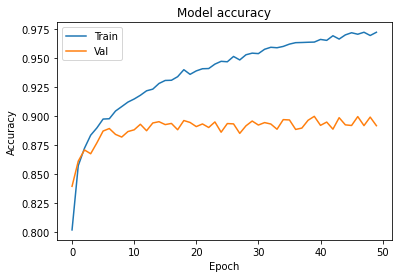

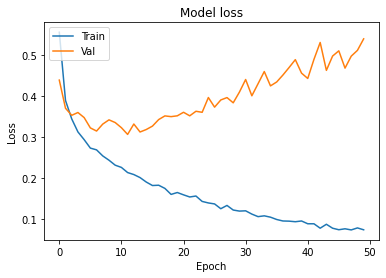

In [ ]:
plot_history(history)

**What could you notice in the loss graph training the model over large number of epochs?**

(Training loss continue to dicrease in a flatten way until to go near 0; validation loss after a while starts to increase significantly -> OVERFITTING)

## 1.2.4 Evaluate the model


In [ ]:
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.6010 - accuracy: 0.8916
Train: 0.976, Test: 0.892


**Try to play with these parameters (loss, learning rate and optimizers) in order to see how this choice affects the accuracy.**
What do you expect? which is faster?

The learning rate can be passed as a parameter for the optimizer (e.g., tensorflow.keras.optimizers.Adam(lr=0.01).

# 1.3 Overfitting
Given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.<br>
A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether).<br>
How to improve generalization of our model on unseen data?<br>
In this section we will:
* 1.3.1 Add weight regularization
* 1.3.2 Dropout
* 1.3.3 Early stopping

## 1.3.1 Add weight regularization
A common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular".<br>
This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights.<br> This cost comes in two flavors:
* L1 regularization
* L2 regularization

In tf.keras, weight regularization is added by passing weight regularizer instances to layers as keyword arguments.

Epoch 1/5
329/329 [==============================] - 2s 5ms/step - loss: 0.9249 - accuracy: 0.7901 - val_loss: 0.7264 - val_accuracy: 0.8043
Epoch 2/5
329/329 [==============================] - 1s 4ms/step - loss: 0.6059 - accuracy: 0.8440 - val_loss: 0.5909 - val_accuracy: 0.8428
Epoch 3/5
329/329 [==============================] - 1s 4ms/step - loss: 0.5364 - accuracy: 0.8582 - val_loss: 0.5229 - val_accuracy: 0.8621
Epoch 4/5
329/329 [==============================] - 1s 4ms/step - loss: 0.5118 - accuracy: 0.8621 - val_loss: 0.5297 - val_accuracy: 0.8543
Epoch 5/5
329/329 [==============================] - 1s 4ms/step - loss: 0.4890 - accuracy: 0.8663 - val_loss: 0.5040 - val_accuracy: 0.8591


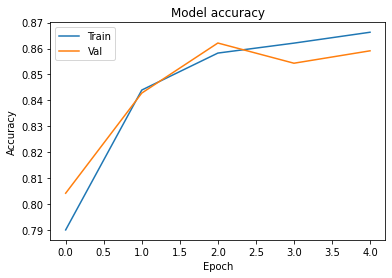

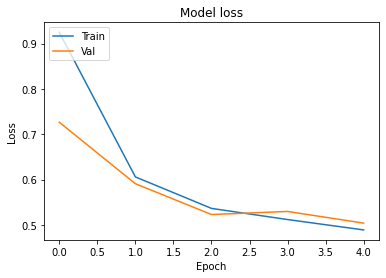

313/313 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.8515
Train: 0.871, Test: 0.851


In [ ]:
from  tensorflow.keras import regularizers
# Build the model
model = Sequential()
model.add(Flatten())
# Add a Dense layer with 512 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
# Add a Dense layer with 256 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
# Add a Dense layer with 128 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
# Add a Dense layer with 64 neurons, with relu as activation function and a l2 regularizer (with 0.001 as regularization value) as kernel regularizer 
model.add(Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(Dense(num_classes, activation='softmax'))


# Compile the model you just created using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric
model.compile(optimizer=adam,
              loss=loss[0],
              metrics=[metrics[0]])

# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
batch_size = 128
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data =(x_val, y_val))

# Call the plot_history function to plot the obtained results
plot_history(history)

# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

## 1.3.2 Dropout
Dropout is one of the most effective and most commonly used regularization techniques for neural networks.<br>
Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training.<br>
<img src="https://drive.google.com/uc?id=1PcGnn9cdM5JQk2nxRHAFPZAtBj1fNMvk" width="600px"><br>

The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5; at test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In [ ]:
from tensorflow.keras.layers import Dropout
# Build the model
model = Sequential()
model.add(Flatten())
# Add a Dense layer with 512 neurons, with relu as activation function
model.add(Dense(512, activation='relu'))
# Add a Dropout layer with 0.3 drop probability
model.add(Dropout(0.3))
# Add a Dense layer with 256 neurons, with relu as activation function
model.add(Dense(256, activation='relu'))
# Add a Dropout layer with 0.3 drop probability
model.add(Dropout(0.3))
# Add a Dense layer with 128 neurons, with relu as activation function
model.add(Dense(128, activation='relu'))
# Add a Dropout layer with 0.3 drop probability
model.add(Dropout(0.3))
# Add a Dense layer with 64 neurons, with relu as activation function
model.add(Dense(64, activation='relu'))
# Add a Dense layer with number of neurons equal to the number of classes, with softmax as activation function
model.add(Dense(num_classes, activation='softmax'))


# Compile the model you just created using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric
model.compile(optimizer=adam,
              loss=loss[0],
              metrics=[metrics[0]])

# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
batch_size = 128
epochs = 5
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data =(x_val, y_val))

# Call the plot_history function to plot the obtained results
plot_history(history)

# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

## 1.3.3 Early stopping
Validation can be used to detect when overfitting starts during supervised training of a neural network; training is then stopped before convergence to avoid the overfitting.<br>

<img src="https://drive.google.com/uc?id=1prBt0w2oWIviRDjOSRKP2TglDGUr-EGZ" width="400px"><br><br>



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

os.mkdir('my_checkpoint_dir')

# early stopping https://keras.io/callbacks/
es_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Create checkpoint callback that will save the best model observed during training for later use
checkpoint_path = "my_checkpoint_dir/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = ModelCheckpoint(checkpoint_path,monitor='val_loss',save_weights_only=True,verbose=1)

In [ ]:
# Build the model
model = Sequential()
model.add(Flatten())
# Add a Dense layer with 512 neurons, with relu as activation function
model.add(Dense(512, activation='relu'))
# Add a Dense layer with 256 neurons, with relu as activation function
model.add(Dense(256, activation='relu'))
# Add a Dense layer with 128 neurons, with relu as activation function
model.add(Dhttp://localhost:8888/notebooks/DNN_hands-on.ipynb#ense(128, activation='relu'))
# Add a Dense layer with 64 neurons, with relu as activation function
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model you just created using 
# adam optimizer as optimizer
# sparse categorical crossentropy as loss function
# accuracy as metric
model.compile(optimizer=adam,
              loss=loss[0],
              metrics=[metrics[0]])

# fit your model and save the returned value as "history". 
# Use both the train and validation set 
# Set both properly the batch size value and the epochs value
# Be careful to also set properly the callbacks parameter list
batch_size =128
epochs = 10
history = model.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_val, y_val), epochs=epochs, verbose=1, callbacks=[es_callback, cp_callback])
# This may generate warnings related to saving the state of the optimizer.

# Call the plot_history function to plot the obtained results
plot_history(history)

# Evaluate
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))